In [16]:
import pandas as pd


In [17]:
data_df = pd.read_csv("Resources/Provider_Info.csv")
data_df.head()

,index,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Provider Phone Number,Provider SSA County Code,Provider County Name,...,Cycle 3 Total Health Score,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Processing Date
0,0,015019,MERRY WOOD LODGE CARE AND REHABILITATION CENTER,P O BOX 130,ELMORE,AL,36025,3345678484,250,Elmore,...,24.0,22.667,0,1,1,$6692.00,0,1,130 ELMORE\nAL 36025\n,09/01/2016
1,1,015113,RIVER CITY CENTER,1350 FOURTEENTH AVENUE SOUTHEAST,DECATUR,AL,35601,2563556911,510,Morgan,...,40.0,48.667,0,3,1,$6045.00,0,1,"1350 FOURTEENTH AVENUE SOUTHEAST\nDECATUR, AL ...",09/01/2016
2,2,015112,MAGNOLIA HAVEN HEALTH AND REHABILITATION CENTER,603 WRIGHT STREET,TUSKEGEE,AL,36083,3347274960,430,Macon,...,16.0,15.333,0,0,0,$0.00,0,0,"603 WRIGHT STREET\nTUSKEGEE, AL 36083\n(32.432...",09/01/2016
3,3,015114,SHADESCREST HEALTH CARE CENTER,331 WEST 25TH STREET,JASPER,AL,35502,2053849086,630,Walker,...,52.0,25.333,0,3,1,$189763.00,0,1,"331 WEST 25TH STREET\nJASPER, AL 35502\n(33.82...",09/01/2016
4,4,015123,WASHINGTON COUNTY NURSING HOME,14600 ST STEPHENS AVENUE,CHATOM,AL,36518,2518476412,640,Washington,...,20.0,13.333,0,0,0,$0.00,0,0,"14600 ST STEPHENS AVENUE\nCHATOM, AL 36518\n(3...",09/01/2016


In [18]:
data_df.columns


Index(['index', 'Federal Provider Number', 'Provider Name', 'Provider Address',
       'Provider City', 'Provider State', 'Provider Zip Code',
       'Provider Phone Number', 'Provider SSA County Code',
       'Provider County Name', 'Ownership Type', 'Number of Certified Beds',
       'Number of Residents in Certified Beds', 'Provider Type',
       'Provider Resides in Hospital', 'Legal Business Name',
       'Date First Approved to Provide Medicare and Medicaid services',
       'Continuing Care Retirement Community', 'Special Focus Facility',
       'Most Recent Health Inspection More Than 2 Years Ago',
       'Provider Changed Ownership in Last 12 Months',
       'With a Resident and Family Council',
       'Automatic Sprinkler Systems in All Required Areas', 'Overall Rating',
       'Overall Rating Footnote', 'Health Inspection Rating',
       'Health Inspection Rating Footnote', 'QM Rating', 'QM Rating Footnote',
       'Staffing Rating', 'Staffing Rating Footnote', 'RN Staffing 

In [19]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols



In [20]:
# List of columns to keep
columns_to_keep = [
    'Overall Rating',
    'Health Inspection Rating',
    'Staffing Rating',
    'RN Staffing Rating',
    'Adjusted Total Nurse Staffing Hours per Resident per Day',
    'Number of Facility Reported Incidents',
    'Number of Fines',
    'Total Number of Penalties'
]

# Create a new DataFrame with only the selected columns
new_data_df = data_df[columns_to_keep].copy()

new_data_df.columns

new_data_df.dropna(inplace=True)

new_data_df

,Overall Rating,Health Inspection Rating,Staffing Rating,RN Staffing Rating,Adjusted Total Nurse Staffing Hours per Resident per Day,Number of Facility Reported Incidents,Number of Fines,Total Number of Penalties
0,4.0,3.0,4.0,4.0,3.81554,0,1,1
1,1.0,1.0,3.0,4.0,3.28225,0,1,1
2,5.0,4.0,4.0,4.0,3.72376,0,0,0
3,4.0,3.0,5.0,5.0,5.53756,0,1,1
4,4.0,4.0,4.0,3.0,5.14766,0,0,0
...,...,...,...,...,...,...,...,...
15632,1.0,1.0,1.0,1.0,3.30557,0,0,0
15633,3.0,4.0,4.0,4.0,3.97897,0,0,0
15634,3.0,4.0,3.0,3.0,3.61656,1,0,0
15635,5.0,5.0,2.0,4.0,3.17033,1,0,0


In [21]:
column_name_mapping = {
    'Overall Rating': 'Rating',
    'Health Inspection Rating': 'Inspection',
    'Staffing Rating': 'Staffing',
    'RN Staffing Rating': 'RN_Rating',
    'Adjusted Total Nurse Staffing Hours per Resident per Day': 'Staffing_Hours',
    'Number of Facility Reported Incidents': 'Incidents',
    'Number of Fines': 'Fines',
    'Total Number of Penalties': 'Penalties'
}
new_data_df.rename(columns=column_name_mapping, inplace=True)
new_data_df

,Rating,Inspection,Staffing,RN_Rating,Staffing_Hours,Incidents,Fines,Penalties
0,4.0,3.0,4.0,4.0,3.81554,0,1,1
1,1.0,1.0,3.0,4.0,3.28225,0,1,1
2,5.0,4.0,4.0,4.0,3.72376,0,0,0
3,4.0,3.0,5.0,5.0,5.53756,0,1,1
4,4.0,4.0,4.0,3.0,5.14766,0,0,0
...,...,...,...,...,...,...,...,...
15632,1.0,1.0,1.0,1.0,3.30557,0,0,0
15633,3.0,4.0,4.0,4.0,3.97897,0,0,0
15634,3.0,4.0,3.0,3.0,3.61656,1,0,0
15635,5.0,5.0,2.0,4.0,3.17033,1,0,0


In [26]:
reg2 = 'Rating ~ Inspection + Staffing + RN_Rating + Staffing_Hours + Incidents + Fines + Penalties'
reg2_output = smf.ols(reg2,new_data_df).fit()
print(reg2_output.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     9001.
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:11:40   Log-Likelihood:                -14323.
No. Observations:               15198   AIC:                         2.866e+04
Df Residuals:                   15190   BIC:                         2.872e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.3778      0.026    -14.

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


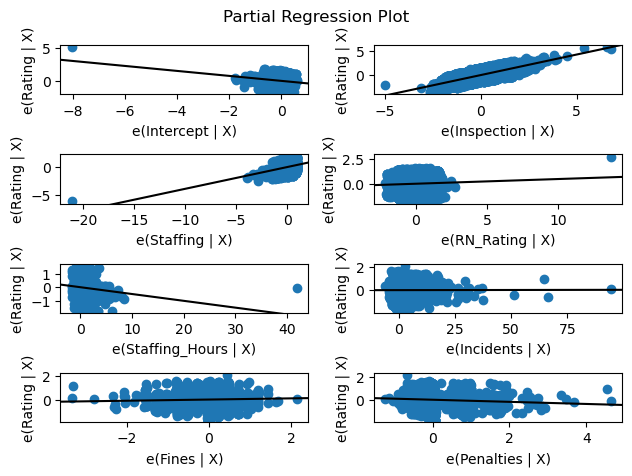

In [27]:
fig2 = sm.graphics.plot_partregress_grid(reg2_output)
fig2.tight_layout(pad=1.0)